In [1]:
## IMPORT NECESSARY LIBRARIES
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.preprocessing import image
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt

In [2]:
## LOADING THE MNIST DATASET
(x_train, y_train), (x_test, y_test) = mnist.load_data()


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
## NORMALIZING THE PIXEL VALUES BETWEEN O AND 1
x_train, x_test = x_train / 255, x_test / 255

In [4]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000,)
(10000,)


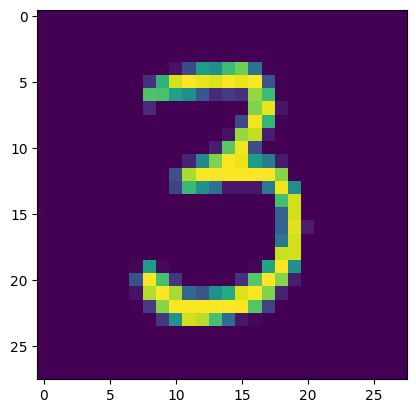

In [5]:
## VISUALISING THE 50th IMAGE FROM THE TRAIN DATASET
plt.imshow(x_train[50])
plt.show()

In [6]:
## MODEL BUILDING AND ARCHITECTURE OF THE CNN
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer with 10 classes for MNIST
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 3, 3, 64)            │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 576)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 64)                  │          36,928 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 93,322 (364.54 KB)

 Trainable params: 93,322 (364.54 KB)

 Non-trainable params: 0 (0.00 B)

In [7]:
## MODEL COMPILATION
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [8]:
## TRAINING THE NETWORK
history = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 60s 62ms/step - accuracy: 0.8660 - loss: 0.4380 - val_accuracy: 0.9741 - val_loss: 0.0771
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 61ms/step - accuracy: 0.9822 - loss: 0.0558 - val_accuracy: 0.9859 - val_loss: 0.0413
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 81s 60ms/step - accuracy: 0.9883 - loss: 0.0369 - val_accuracy: 0.9913 - val_loss: 0.0265
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 60ms/step - accuracy: 0.9908 - loss: 0.0299 - val_accuracy: 0.9906 - val_loss: 0.0308
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 56s 59ms/step - accuracy: 0.9925 - loss: 0.0231 - val_accuracy: 0.9919 - val_loss: 0.0299


In [9]:
## FINE TUNING HYPARAMETER BY FREEZING ALL THE LAYERS EXCEPT THE LAST 4 LAYERS
for layer in model.layers[:-4]:
    layer.trainable = False



In [10]:
## RECOMPILATION OF THE MODEL AFTER FINE TUNING
model.compile(optimizer=optimizers.Adam(learning_rate=1e-4),  loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [11]:
## RETRAINING THE NETWORK
history_fine_tune = model.fit(x_train, y_train, epochs=5, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 24s 24ms/step - accuracy: 0.9962 - loss: 0.0122 - val_accuracy: 0.9928 - val_loss: 0.0217
Epoch 2/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 23s 24ms/step - accuracy: 0.9981 - loss: 0.0074 - val_accuracy: 0.9925 - val_loss: 0.0213
Epoch 3/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 41s 24ms/step - accuracy: 0.9989 - loss: 0.0058 - val_accuracy: 0.9919 - val_loss: 0.0227
Epoch 4/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 21s 23ms/step - accuracy: 0.9984 - loss: 0.0062 - val_accuracy: 0.9929 - val_loss: 0.0213
Epoch 5/5
938/938 ━━━━━━━━━━━━━━━━━━━━ 42s 24ms/step - accuracy: 0.9990 - loss: 0.0047 - val_accuracy: 0.9925 - val_loss: 0.0211


In [12]:
## MODEL EVALUATION
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(test_accuracy)

313/313 - 3s - 8ms/step - accuracy: 0.9925 - loss: 0.0211
0.9925000071525574


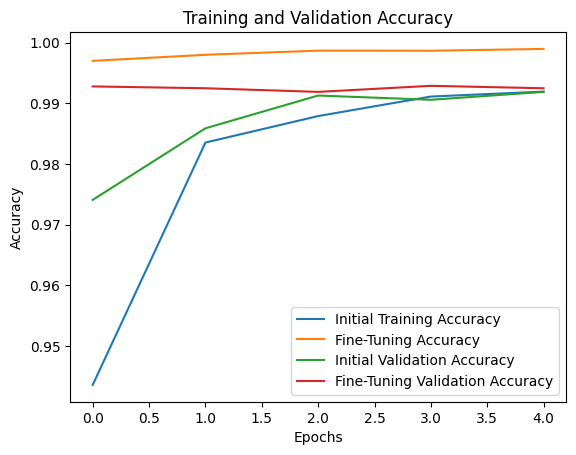

In [13]:
## PLOTTING THE MODEL HISTORY BEFORE AND AFTER FINE TUNING THE HYPERPARAMETERS
plt.plot(history.history['accuracy'], label='Initial Training Accuracy')
plt.plot(history_fine_tune.history['accuracy'], label='Fine-Tuning Accuracy')
plt.plot(history.history['val_accuracy'], label='Initial Validation Accuracy')
plt.plot(history_fine_tune.history['val_accuracy'], label='Fine-Tuning Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()